# Tutorial

This notebook covers the main features of the cleaningLDA scoping pipeline. We will read in a corpus from the Ukraine Revolution Dataset, pretrain and train the topic model, and detect changepoints.

First, import the cleaningLDA module and create a directory named `data`.

In [1]:
import cleaningLDA

After loading in the module, we will "pretrain" the LDA topic model from 10 to 50 topics. Doing so, we automatically will calculate the 'c_v' coherence score as well as use elbow detection to find the most optimal model. 

In [7]:
topics = [10,20,30,40,50]

model_attributes = cleaningLDA.cleaningLDA.pretrain_topic_models(path_to_corpus = 'data/corpus.txt',  topics_to_try = topics, find_best_model = True, verbose = True)

Training LDA on Topics: 100%|██████████| 5/5 [09:56<00:00, 119.23s/it]


After running the `pretrain_topic_models` method, we get the `model_attributes` variable. This simply returns the coherence scores, number of topics the models were trained on, and if necessary, the index of the most-optimal model. 

In [8]:
model_attributes

{'best_model_index': 3,
 'coherence_scores': [0.6077533734033259,
  0.6125223409700016,
  0.6200145829317023,
  0.6262393239027396,
  0.6076020335487536],
 'topics': [10, 20, 30, 40, 50]}

Training the topic model to get the topic distributions...

In [11]:
cleaningLDA.cleaningLDA.train_topic_models(path_to_corpus = 'data/corpus.txt', chosen_model = 'data/topics_40_pretrained_model.pkl')

In [2]:
topic_distributions = 'data/topics_40_document_topic_distributions.pkl'

We now can detect the changepoint

In [3]:
changepoint = cleaningLDA.cleaningLDA.detect_changepoint(topic_distributions_path = topic_distributions, distance_cutoff = 0.6, num_epochs = 4)

In [4]:
changepoint['changepoint']

9

As well as visualize the Jensen-Shannon distances

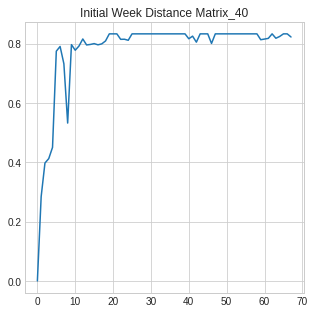

In [4]:
cleaningLDA.cleaningLDA.visualize(topic_distributions_path = topic_distributions, pairwise = False)

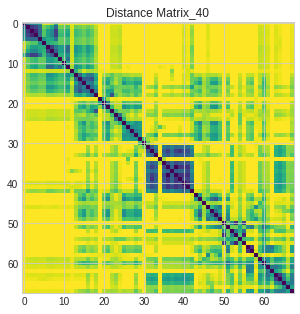

In [5]:
cleaningLDA.cleaningLDA.visualize(topic_distributions_path = topic_distributions, pairwise = True)